# A/B тестирование

# Проверка внедрения новой механники оплаты

## Цель исследования ответить на следующие вопросы:

- Оценить корректность проведения теста и проанализировать его результаты.
- Какие целевые метрики анализа и почему?
- Имеются ли различия в показателях и с чем они могут быть связаны?
- Являются ли эти различия статистически значимыми?
- Стоит ли запускать новую механику на всех пользователей?



## Описание данных:

- groups.csv - файл с информацией о принадлежности пользователя к контрольной или экспериментальной группе (А – контроль, B – целевая группа)

- groups_add.csv - дополнительный файл с пользователями, который вам прислали спустя 2 дня после передачи данных

- active_studs.csv - файл с информацией о пользователях, которые зашли на платформу в дни проведения эксперимента.

- checks.csv - файл с информацией об оплатах пользователей в дни проведения эксперимента.

## Ход исследования:

**Открытие данных:**

   - Загрузка библиотек
   - Загрузка данных
    
**Предобработка данных:**
   
   - Проверка корректности наименований колонок
   - Удаление дубликатов
   - Поиск пропущенных значений
   - Исследование пропусков
   - Удаление/Замена пропусков
   - Исследование соответствия типов    
   
**Изучение и проверка данных:**

   -
   
   
**Оценка результататов A/B-тестирования***

   - Что можно сказать про результаты A/В-тестирования?   
   
**Выводы**   

## Вывод:

Исходя из результатов анализа A/B-теста, мы не обнаружили статистически значимых различий в метрике конверсии в покупку (CR) между контрольной и целевой группами. Однако, стоит отметить, что метрика ARPU показала статистически значимые различия.


В целевой группе наблюдается увеличение среднего чека на одного пользователя (ARPU), что может указывать на положительное воздействие изменений. Таким образом, преминение новой механики оплаты можно использовать на всех пользователей.

### Загрузка библиотек:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import requests
from urllib.parse import urlencode
from tqdm.auto import tqdm
from scipy.stats import chi2_contingency
%matplotlib inline
sns.set(font_scale=2, style='darkgrid', rc={'figure.figsize': (15, 7)})

### Загрузка данных:

In [2]:
groups = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/UhyYx41rTt3clQ', sep=';')
groups_add = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/5Kxrz02m3IBUwQ', sep=',')
active_studs = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/Tbs44Bm6H_FwFQ', sep=',')
checks = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/pH1q-VqcxXjsVA', sep=';')

## Предобработка данных:

### Предобработка данных датафрейма groups

In [3]:
# Функцию для выведения предобработки:
def pred(data):
    duplicates = data.duplicated().sum()
    isna = data.isna().sum()
    return display(data),\
    print('Количество дубликатов равно:', duplicates),\
    print(),\
    print('Количество пропусков равно:', isna),\
    print(),\
    data.info()

In [4]:
pred(groups)

,id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A
...,...,...
74479,5692459,B
74480,5692572,B
74481,5692865,B
74482,5693667,B


Количество дубликатов равно: 0

Количество пропусков равно: id     0
grp    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74484 entries, 0 to 74483
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      74484 non-null  int64 
 1   grp     74484 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


(None, None, None, None, None, None)

- Название колнок корректно.

- Дубликатов не наблюдается.

- Пропусков не наблюдается.

- Типы данных зажаны корректно.

### Предобработка данных в таблице groups_add

In [5]:
pred(groups_add)

,id,grp
0,5694584,B
1,5694830,B
2,5695057,B
3,5698872,B
4,5699067,B
...,...,...
87,200247820,B
88,201032527,B
89,201067612,B
90,201067653,B


Количество дубликатов равно: 0

Количество пропусков равно: id     0
grp    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      92 non-null     int64 
 1   grp     92 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


(None, None, None, None, None, None)

- Название колнок корректно.

- Дубликатов не наблюдается.

- Пропусков не наблюдается.

- Типы данных зажаны корректно.

### Предобработка данных в таблице active_studs

In [6]:
pred(active_studs)

,student_id
0,581585
1,5723133
2,3276743
3,4238589
4,4475369
...,...
8336,1794344
8337,296883
8338,3598448
8339,3610547


Количество дубликатов равно: 0

Количество пропусков равно: student_id    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8341 entries, 0 to 8340
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   student_id  8341 non-null   int64
dtypes: int64(1)
memory usage: 65.3 KB


(None, None, None, None, None, None)

- Название колнок корректно.

- Дубликатов не наблюдается.

- Пропусков не наблюдается.

- Типы данных зажаны корректно.

### Предобработка данных в таблице checks

In [7]:
pred(checks)

,student_id,rev
0,1627,990.0
1,3185,690.0
2,25973,690.0
3,26280,690.0
4,100300,990.0
...,...,...
536,5645737,1900.0
537,5651566,1900.0
538,5662322,1900.0
539,5681918,1900.0


Количество дубликатов равно: 0

Количество пропусков равно: student_id    0
rev           0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  541 non-null    int64  
 1   rev         541 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.6 KB


(None, None, None, None, None, None)

- Название колнок корректно.

- Дубликатов не наблюдается.

- Пропусков не наблюдается.

- Типы данных зажаны корректно.

## Изучение и проверка данных:

### Объединение данных, которые прислали спустя 2 дня

In [8]:
full_groups = groups.merge(groups_add, how='outer')

In [9]:
full_groups.duplicated().value_counts()

False    74576
dtype: int64

In [10]:
full_groups['grp'].value_counts()

B    59883
A    14693
Name: grp, dtype: int64

### Данные пользователей, которые были на платформе в день проведения эксперимента

In [11]:
active_studs.head()

,student_id
0,581585
1,5723133
2,3276743
3,4238589
4,4475369


In [12]:
active_studs = active_studs.rename(columns={'student_id': 'id'})

In [13]:
test = active_studs.merge(full_groups, how='inner', on='id')

In [14]:
test

,id,grp
0,581585,A
1,5723133,A
2,3276743,B
3,4238589,A
4,4475369,B
...,...,...
8336,1794344,B
8337,296883,B
8338,3598448,B
8339,3610547,B


In [15]:
test['grp'].value_counts()

B    6803
A    1538
Name: grp, dtype: int64

- Контрольная группа в момент проведения эксперимента (A) - 1538

- Целевая группа в момент проведения эксперимента (B) - 6803

### Объединяем данные пользователей, присутствующих на эксперименте, с данными об их оплате

In [16]:
checks.head()

,student_id,rev
0,1627,990.0
1,3185,690.0
2,25973,690.0
3,26280,690.0
4,100300,990.0


In [17]:
checks = checks.rename(columns={'student_id': 'id'})

In [18]:
test = test.merge(checks, how='left', on='id')

In [19]:
test.head()

,id,grp,rev
0,581585,A,NaN
1,5723133,A,NaN
2,3276743,B,NaN
3,4238589,A,NaN
4,4475369,B,NaN


Если соеденим таблицы с помощью inner join заметим не полное соответствие, из этого следует, что некоторые пользователи совершили оплату, но их нет в посетивших эксперимент пользователей

In [20]:
test.merge(checks, how='inner', on='id')

,id,grp,rev_x,rev_y
0,1184303,A,1530.0000,1530.0000
1,3354191,B,1900.0001,1900.0001
2,3278734,B,1900.0000,1900.0000
3,720651,A,1980.0000,1980.0000
4,1232221,B,1900.0000,1900.0000
...,...,...,...,...
387,3890326,B,199.0000,199.0000
388,1390994,A,398.0000,398.0000
389,1516339,A,290.0000,290.0000
390,3910596,B,597.0000,597.0000


In [21]:
checks

,id,rev
0,1627,990.0
1,3185,690.0
2,25973,690.0
3,26280,690.0
4,100300,990.0
...,...,...
536,5645737,1900.0
537,5651566,1900.0
538,5662322,1900.0
539,5681918,1900.0


In [22]:
541 - 392

149

**По 149 пользователям есть инофрмация оплаты в день проведения эксперимента, но нет информации об их пристутствии на платформе в день проведения эксперимнета**

### Предположения о происхождении аномалий:
* Сбой системы при добовлении данных
* Присутствие на сайте перед началом эксперимента и последующая покупка услуги, в следствии этого попадение в таблицу checks и не попадение в active_studs

Так как неизвестна природа этих аномалий в точности, продолжу анализ над данными, которые имеют полное соотвествии

## Исследовательский анализ:


### Метрики эксперемента

Так как эксперемент связан с новой механникой оплаты услуг на сайте, что на прямую влияет на выручку, из этого следует, что основными метриками эксперемента будут являтся метрики продукта, которые говорят нам о том, что происходит с выручкой, и количеством покупателей. Увеличилась ли выручка с нововведением и увеличелось ли число покупателей? На эти вопросы нам помогут ответить эти метрики:
* **CR** - метрика, которая показывает, какая часть потенциальных клиентов компании совершила покупку
* **ARPU** - средняя выручка на одного пользователя

Для корректного подсчета суммы, заменим отсутствующие значения на 0

In [23]:
test['rev'] = test['rev'].fillna(0).round(2)
test.head()

,id,grp,rev
0,581585,A,0.0
1,5723133,A,0.0
2,3276743,B,0.0
3,4238589,A,0.0
4,4475369,B,0.0


Считаем метрики

In [24]:
data = test.groupby('grp', as_index=False)['rev'].count().rename(columns={'grp': 'группа', 'rev': 'клиенты'})

In [25]:
data['выручка'] = test.groupby('grp', as_index=False)['rev'].sum().rev

In [26]:
data['покупки'] = test.query('rev > 0').groupby('grp', as_index=False)['rev'].count().rev

In [27]:
data

,группа,клиенты,выручка,покупки
0,A,1538,72820.0,78
1,B,6803,394974.0,314


*Расчет CR*

In [28]:
data['CR'] = (data['покупки'] / data['клиенты']).mul(100).round(2)

*Расчет ARPU*

In [29]:
data['ARPU'] = (data['выручка']/data['клиенты']).round(2)

*Расчет ARPPU*

In [30]:
data['ARPPU'] = (data['выручка']/data['покупки']).round(2)

In [31]:
data

,группа,клиенты,выручка,покупки,CR,ARPU,ARPPU
0,A,1538,72820.0,78,5.07,47.35,933.59
1,B,6803,394974.0,314,4.62,58.06,1257.88


###Распределение количества покупок

Посмотрим на график распределения количества покупок.
Видим что график имеет ненормальное распределение и скошен вправо, это сведетельствует о смещеении среднего значения и поэтому стоит посмотреть на медианное значения для наших групп

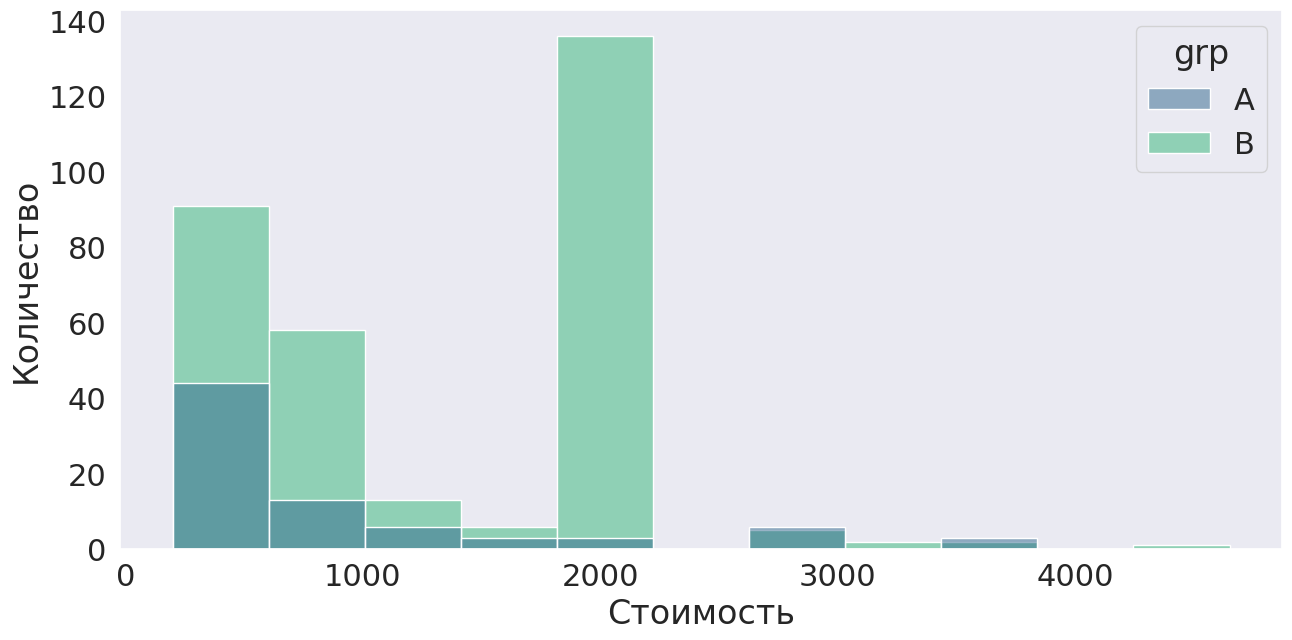

In [32]:
sns.histplot(data=test.query('rev > 0'), x='rev', hue='grp', palette='viridis',  )
plt.xlabel('Стоимость')
plt.ylabel('Количество')
plt.grid()


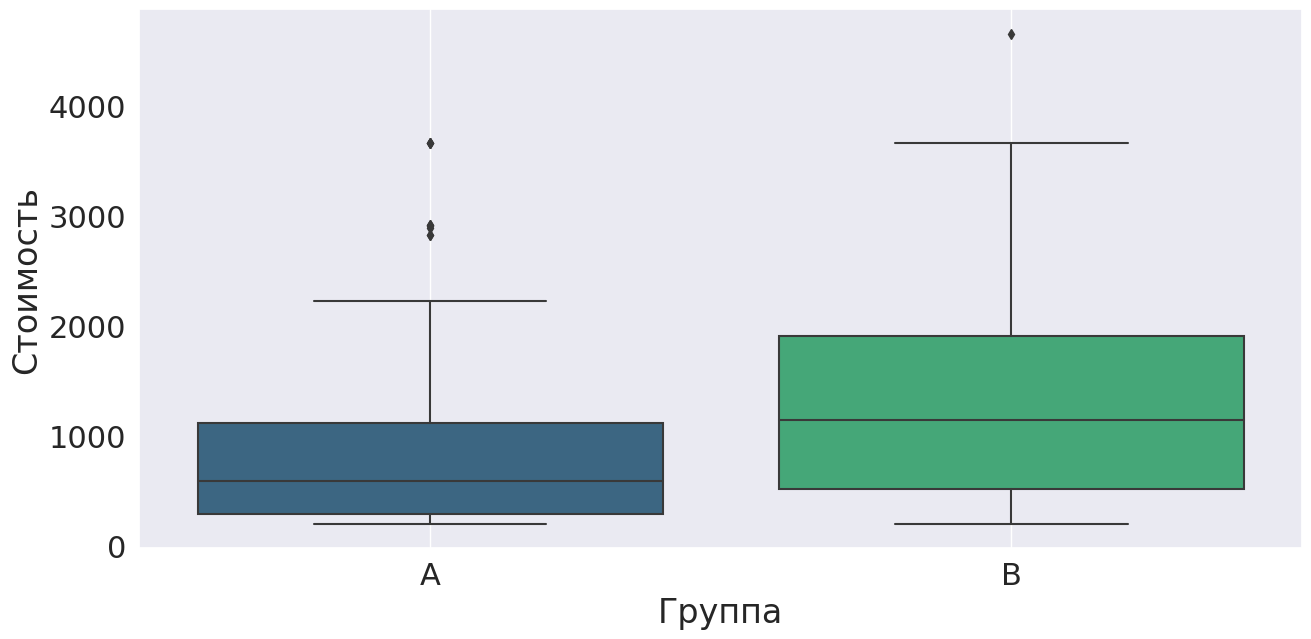

In [33]:
sns.boxplot(data=test.query('rev > 0'), x='grp', y='rev', palette='viridis')
plt.ylabel('Стоимость')
plt.xlabel('Группа')
plt.grid()

Как видно из графиков, значения тестовой группы выше, чем у контрольной. Связано это с тем, что у нас не равное распределение пользователей по группам (в тестовой пользователей больше, приблизительно, в 4 раза). Из гистограммы видно, что все значения одинаково пропорциональны, кроме оплат тестовой группы, при оплате в 2000.

In [34]:
test.query('grp == "A"').rev.value_counts().sort_values(ascending=False).head(10)

0.0       1460
290.0       25
580.0        6
990.0        5
590.0        5
199.0        5
690.0        4
3660.0       3
840.0        3
1530.0       3
Name: rev, dtype: int64

In [35]:
test.query('grp == "B"').rev.value_counts().sort_values(ascending=False).head(10)

0.0       6489
1900.0     128
290.0       45
199.0       27
840.0       21
990.0       17
690.0       13
1140.0       9
590.0        6
398.0        6
Name: rev, dtype: int64

Наблюдается анамальное значение в группе **B** при покупке на сумму в 1900

Так как не известен

### Проверка на нормальность распределения покупок после логарифмирования

Данные имеют не нормальное распределение, поэтому первое что мы можем сделать, это привести их к нормальному распределению при помощи логарифмирования

<Axes: >

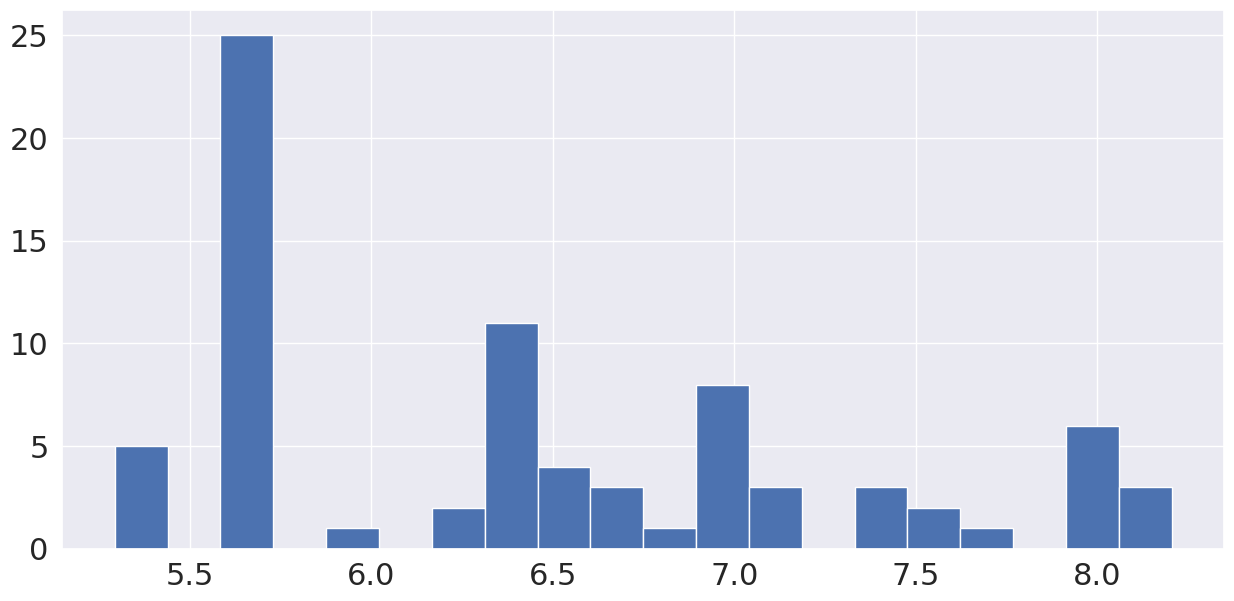

In [36]:
 test.query('grp == "A" and rev > 0').rev.apply(np.log).hist(bins=20)

<Axes: >

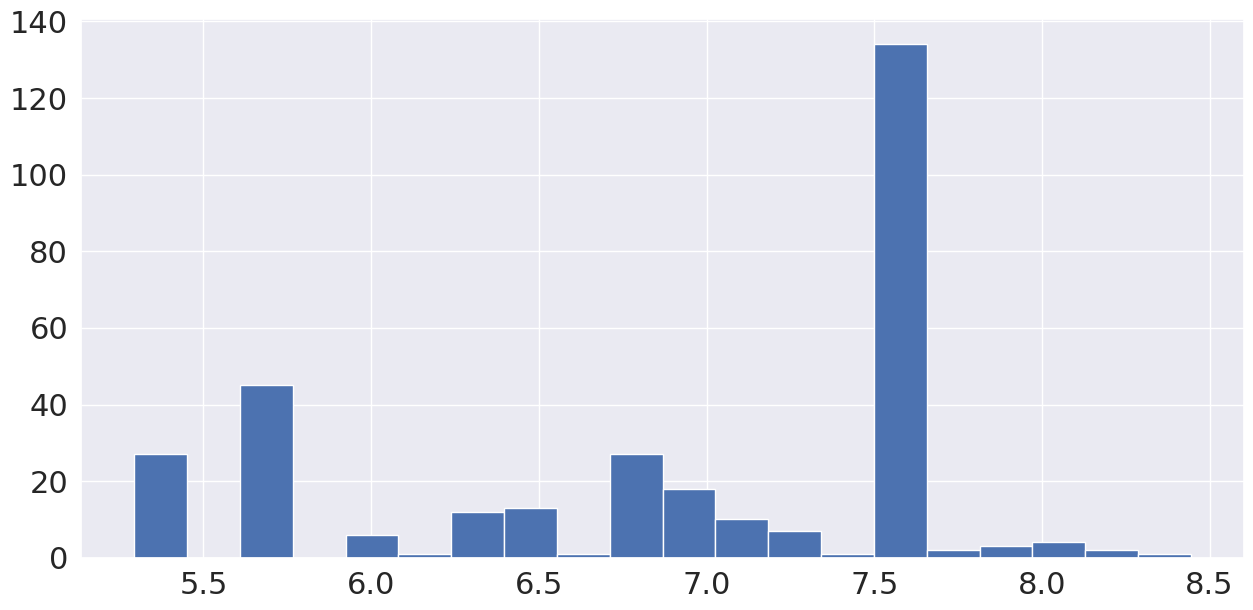

In [37]:
 test.query('grp == "B" and rev > 0').rev.apply(np.log).hist(bins=20)

Проверим наши распределения покупок в группах на нормальность, для этого используем тест Шапиро-Уилка.
Сформулируем гипотезы:
* **H0** - величина оплаты клиентов распределена нормально

* **H1** - величина оплаты клиентов распределена не нормально
* **a** = 0.05

In [38]:
stats.shapiro(test.query('grp == "A" and rev > 0').rev.apply(np.log))[1] < 0.05

True

In [39]:
stats.shapiro(test.query('grp == "B" and rev > 0').rev.apply(np.log))[1] < 0.05

True

Обе группы имеют не нормальное распределение

### Проверка на однородносить дисперсий в распределении покупок

Сформулируем гипотезы:
* **H0 - дисперсии контрольной и целевой групп одинаковы**

* **H1 - дисперсии контрольной и целевой групп различны**

In [40]:
stats.levene(test.query('grp == "A" and rev > 0').rev, \
             test.query('grp == "B" and rev > 0').rev)[1] < 0.05

False

Тест не показал статистически значимых различий, принимаем нулевую гипотезу о равенсте дисперсий

### Проверка различий в метрике CR

Сформулируем гипотезы:
* **H0 - различий между конверсиями оплат двух групп нет**

* **H1 - разлчия между конверсиями оплат двух групп есть**

*Добавим в нашу основую таблицу столбец со значениями об оплате, где 1 - оплатил и 0 - без оплаты, для этого использую lambda функцию*

In [60]:
stat, p, dof, expected = chi2_contingency(pd.crosstab(test['grp'], test['pay']))
stat, p, p < 0.05

(0.48480826522557896, 0.48625240457231045, False)

Мы не можем опровергнуть гипотезу H0, так как p_value > 0.05.
Различия конверсии в оплту между группами не являются статистически значимыми.
Из этого можно сделать вывод, что новая схема оплаты не сильно повлияла на конверсию в покупку

### Проверка различий в метрике ARPU

Сформулируем гипотезы:
* **H0** - ARPU в тестовой и контрольной группе статистически значимо не отличаются

* **H1** - ARPU в тестовой и контрольной группе статистически значимо отличаются

Так как распределение значений выручки не нормальное, чтобы оценить статистические свойства метрики ARPU мы используем bootstrap.

Для проведения bootstrap анализа создадим функцию

In [42]:
def get_bootstrap(
    data_column_1,  # числовые значения первой выборки
    data_column_2,  # числовые значения второй выборки
    boot_it=1000,  # количество бутстрэп-подвыборок
    statistic=np.mean,  # интересующая нас статистика
    bootstrap_conf_level=0.95  # уровень значимости
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)):  # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len,
            replace=True  # параметр возвращения
        ).values

        samples_2 = data_column_2.sample(
            boot_len,  # чтобы сохранить дисперсию, берем такой же размер выборки
            replace=True
        ).values

        boot_data.append(statistic(samples_1 - samples_2))
    pd_boot_data = pd.DataFrame(boot_data)

    left_quant = (1 - bootstrap_conf_level) / 2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])

    p_1 = stats.norm.cdf(
        x=0,
        loc=np.mean(boot_data),
        scale=np.std(boot_data)
    )
    p_2 = stats.norm.cdf(
        x=0,
        loc=-np.mean(boot_data),
        scale=np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2

    # Визуализация
    _, _, bars = plt.hist(pd_boot_data[0], bins=50)
    for bar in bars:
        if abs(bar.get_x()) <= quants.iloc[0][0] or abs(bar.get_x()) >= quants.iloc[1][0]:
            bar.set_facecolor('red')
        else:
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')

    plt.style.use('ggplot')
    plt.vlines(quants, ymin=0, ymax=50, linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()

    return {"boot_data": boot_data,
            "quants": quants,
            "p_value": p_value}

  0%|          | 0/10000 [00:00<?, ?it/s]

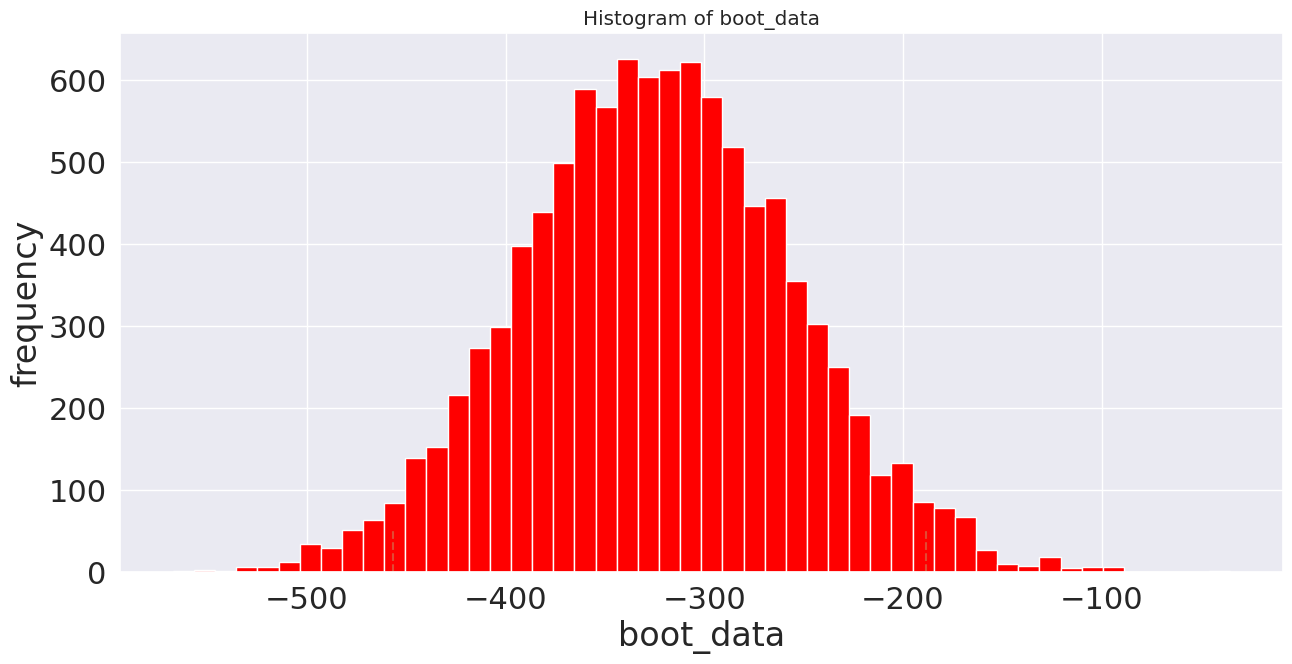

p-value = 1.7730171628253627e-06


In [43]:
booted_data = get_bootstrap(test.query('grp == "A" and rev > 0').rev, test.query('grp == "B" and rev > 0').rev, boot_it=10000)
print(f'p-value = {booted_data["p_value"]}')

*p-value < 0.05, это говорит о том, что вероятность ошибки I рода крайне мала, из этого следует, что мы отвергаем H0(нулевую гипотизу) об отсутсвтии различий средних значений*

## Вывод:

Исходя из результатов анализа A/B-теста, мы не обнаружили статистически значимых различий в метрике конверсии в покупку (CR) между контрольной и целевой группами. Однако, стоит отметить, что метрика ARPU показала статистически значимые различия.


В целевой группе наблюдается увеличение среднего чека на одного пользователя (ARPU), что может указывать на положительное воздействие изменений. Таким образом, преминение новой механики оплаты можно использовать на всех пользователей.